# Data Visualization Project Gender Gap in College Degree # 

## Introduction: #
How to use data visualization to communicate insights and tell stories? In this project, I will focus on applying data visualization techniques to imporve the plot aesthetics. Along the way, I will explain the principles which put into practice and build the framework for future projects. 

#### Data Source ####
The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. 

## Part 1:  Explore the Gender Gap Within STEM Category：

We are using the line chart to explore the gneder gap changes overtime. Line charts work the best when there is a logical relationship connection between two adjacent points. In this project, the connection is the flow of time.     Between 2 different years, the gender precentage between man and women is fluctuating, and time is passing. In part one, we create a loop to generate line charts and applied three other principles to improve the plots appearance. 

### Summary of Highlights :
1. Using loops to generate plots
2. Setting line color with RGB 
3. Maximize Data-Ink Ratio by: 
   * Hiding Ticks Mark
   * Hiding Spines
   * Replacing the legend with annotation
4. Improve the layout and Ordering

( Note: we'll order the charts by decreasing ending gender gap. We've populated the list stem_cats with the six STEM degree categories, ordering them by decreasing ending gender gap. )
   


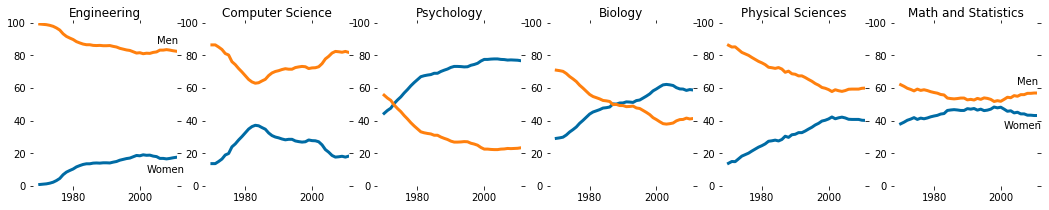

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

#Setting the line color with RGB. 
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# Create a stem_cats variable that including all the STEM categories. 
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# Seting the space for figures. 
fig = plt.figure(figsize=(18, 3))

# Creating the loops to auto-generate linescharts for each stem programs seperately. 
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
# Remove all the spines. 
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    
# Setting the limits for both x-axis and y-axis and naming the titles. 
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])


# Replacing the legend with annotation for the first and last graphs. 
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
        
        
plt.show()

## Part 2:  Compare the STEM Category with Others Programs. 

There are 17 different programs in the dataset and we classified them into 3 main categories. 
* stem_cats: Statistic, Technology, Engineering, Mathematics 
* lib_arts_cats: Foregin Languages, English, Communications and Journalism, art and performance. etc
* other_cats: Health Profession, Public Administration, Education, etc

In [2]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

We would like to compare other categories with STEM majors side by side. We will use a subplot grid layout of 6 rows by 3 columns. While in part one, the stem_cats was ordered by ending gener gap, all the three of these lists are ordered in descending order by the percentage of degrees awarded to women. 

### Highlights: 
* Using the step parameters from range funtion() to specify the line charts sequence.  
  For 1st column, 0,3,6,9,12,15. which is the 1st column within the grid layout. 
* De-cluster the visulization by removing un-nesscary y-axis labels and adding the horizontal line. 
* Maximize the Data-Ink Ratio: 
   1. Removed all the x-axis label bottoms expect the the plots at the bottom. 
   2. Removed all the spine, ticks. 

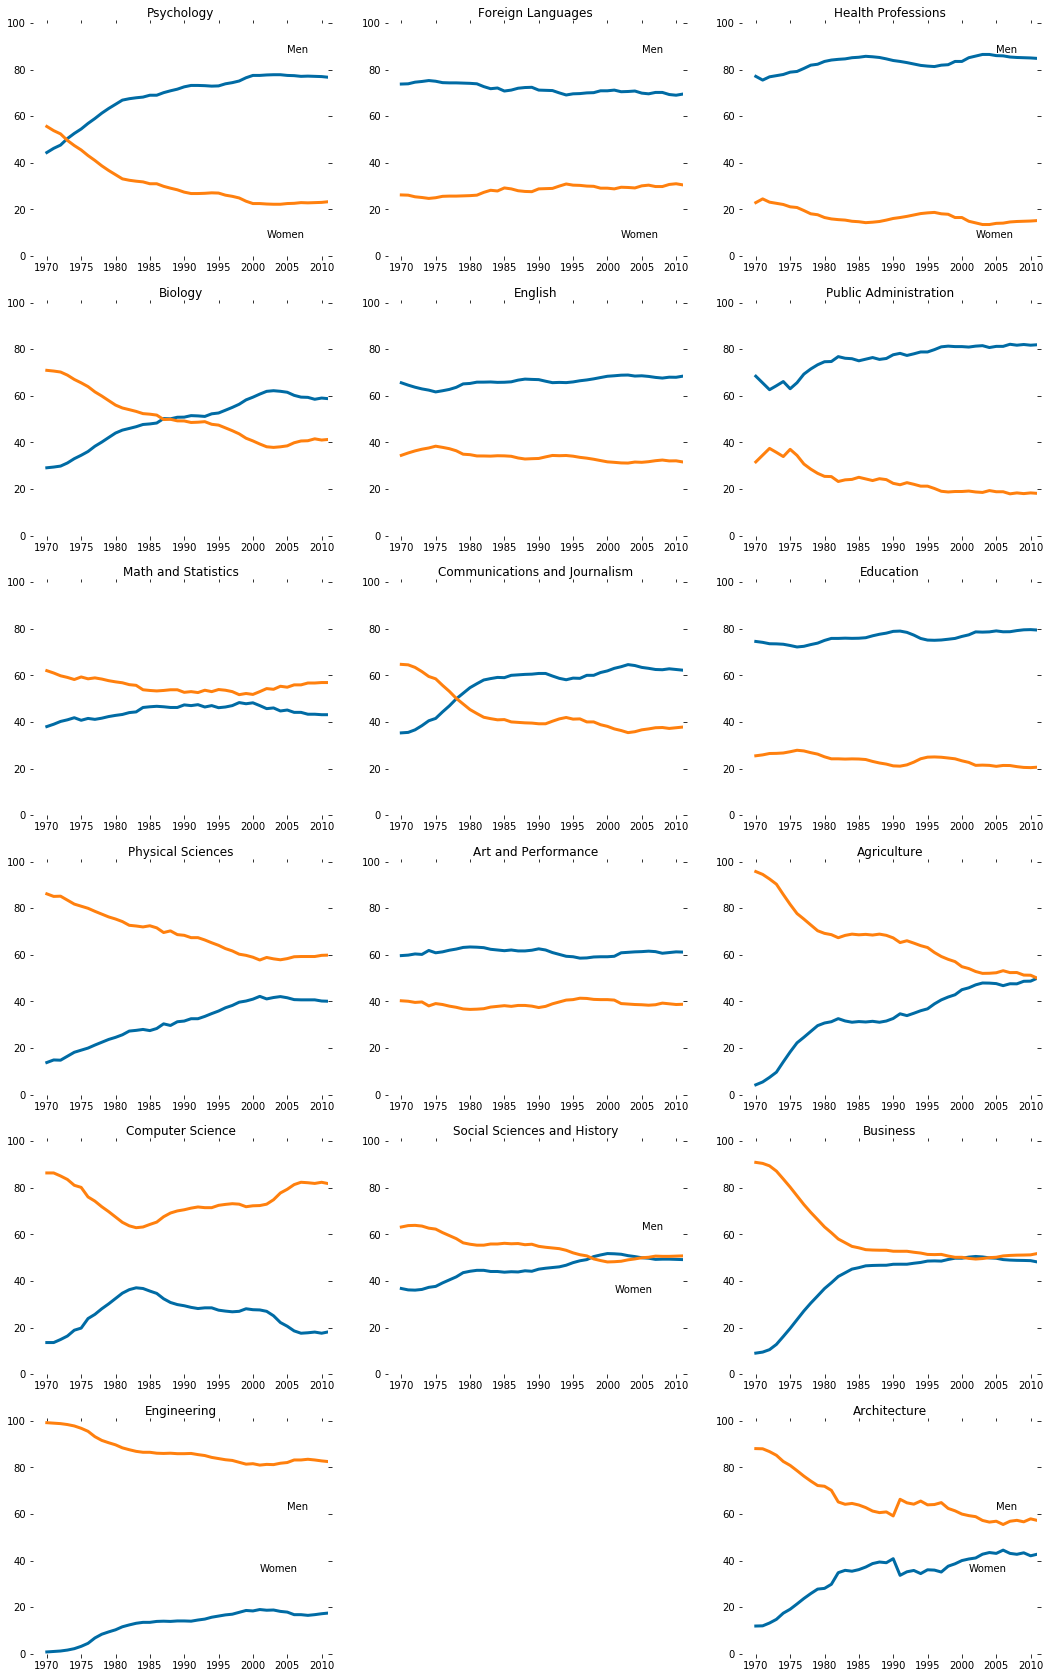

In [3]:
fig = plt.figure(figsize=(18, 30))

# Creating the 1st column, for the stem category: 
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
   
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
# Creating the second column, for the lib and arts category:
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    #Creating the line chart for lib and arts categories:
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif cat_index == 4:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

# Creating the third column, for the other category:

for sp in range(2,18,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    #Creating the line chart for other categories:
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if cat_index == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')       
                
plt.show()

# Conclusion: 
